In [ ]:
!nvidia-smi

Fri May 24 05:13:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import plot_loss_curves, unzip_data, walk_through_dir

--2024-05-24 05:13:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-24 05:13:50 (95.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2024-05-24 05:13:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.20.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   259MB/s    in 0.6s    

2024-05-24 05:13:56 (259 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [ ]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMAGE_SIZE,
                                                                 label_mode="categorical",
                                                                 batch_size=BATCH_SIZE,
                                                                 )
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                 image_size=IMAGE_SIZE,
                                                                 label_mode="categorical",
                                                                 batch_size=BATCH_SIZE,
                                                                 )

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
input = tf.keras.layers.Input(shape=(224,224,3),name="Input_Layer")
x = base_model (input)
x = tf.keras.layers.GlobalAveragePooling2D(name="Global_average_pooling_2d") (x)
outputs = tf.keras.layers.Dense(10,activation="softmax") (x)

model_0 = tf.keras.Model(input,outputs)
model_0.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_0 = model_0.fit(train_data,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=int(0.25 * len(test_data)),epochs=5)

16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/5
24/24 [==============================] - 19s 350ms/step - loss: 1.9043 - accuracy: 0.3893 - val_loss: 1.3277 - val_accuracy: 0.7138
Epoch 2/5
24/24 [==============================] - 4s 156ms/step - loss: 1.1054 - accuracy: 0.7693 - val_loss: 0.8697 - val_accuracy: 0.8240
Epoch 3/5
24/24 [==============================] - 4s 172ms/step - loss: 0.8028 - accuracy: 0.8213 - val_loss: 0.6965 - val_accuracy: 0.8520
Epoch 4/5
24/24 [==============================] - 3s 128ms/step - loss: 0.6495 - accuracy: 0.8613 - val_loss: 0.6234 - val_accuracy: 0.8586
Epoch 5/5
24/24 [==============================] - 3s 129ms/step - loss: 0.5542 - accuracy: 0.8827 - val_loss: 0.5548 - val_accuracy: 0.8553


In [ ]:
base_model_copy = tf.keras.applications.ResNet101(include_top=False)
base_model_copy.trainable = False
input = tf.keras.layers.Input(shape=(224,224,3),name="Input_Layer")
x = base_model_copy (input)
x = tf.keras.layers.GlobalAveragePooling2D(name="Global_average_pooling_2d") (x)
outputs = tf.keras.layers.Dense(10,activation="softmax") (x)

model_0_copy = tf.keras.Model(input,outputs)
model_0_copy.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_0_coy = model_0_copy.fit(train_data,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=int(0.25 * len(test_data)),epochs=5)

171446536/171446536 [==============================] - 1s 0us/step
Epoch 1/5
24/24 [==============================] - 20s 474ms/step - loss: 2.3369 - accuracy: 0.2747 - val_loss: 1.5059 - val_accuracy: 0.4852
Epoch 2/5
24/24 [==============================] - 8s 310ms/step - loss: 1.1681 - accuracy: 0.6173 - val_loss: 1.0466 - val_accuracy: 0.6661
Epoch 3/5
24/24 [==============================] - 10s 384ms/step - loss: 0.8507 - accuracy: 0.7440 - val_loss: 0.9828 - val_accuracy: 0.6891
Epoch 4/5
24/24 [==============================] - 10s 387ms/step - loss: 0.6818 - accuracy: 0.7853 - val_loss: 0.8661 - val_accuracy: 0.7253
Epoch 5/5
24/24 [==============================] - 8s 340ms/step - loss: 0.5370 - accuracy: 0.8507 - val_loss: 0.8922 - val_accuracy: 0.7072


In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 74ms/step - loss: 0.5618 - accuracy: 0.8568


[0.5617590546607971, 0.8568000197410583]

In [ ]:
for i , j in enumerate(base_model.layers):
  print(i,j.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [ ]:
model_0_copy.evaluate(test_data)

79/79 [==============================] - 15s 186ms/step - loss: 0.8808 - accuracy: 0.7004


[0.8807660341262817, 0.7003999948501587]

In [ ]:
for i , j in enumerate(base_model_copy.layers):
  print(i,j.name)

0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['normalization[0

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 Global_average_pooling_2d   (None, 1280)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


In [ ]:
base_model_copy.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                      

In [ ]:
model_0_copy.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet101 (Functional)      (None, None, None, 2048   42658176  
                             )                                   
                                                                 
 Global_average_pooling_2d   (None, 2048)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 10)                20490     
                                                                 
Total params: 42678666 (162.81 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 42658176 (162.73 MB)
_________________________________________________________________


<Axes: title={'center': 'Model_0 Cruves'}>

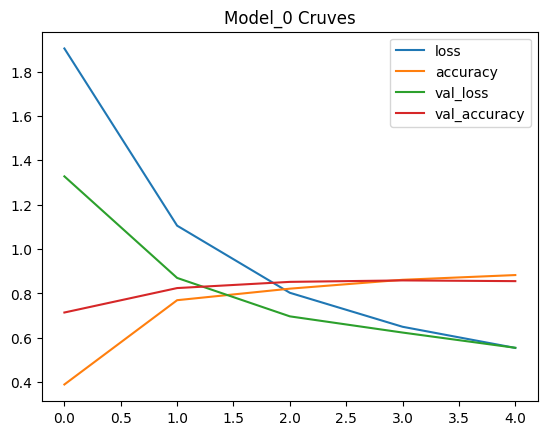

In [ ]:
import pandas as pd
h0 = pd.DataFrame(history_0.history)
h0.plot(title="Model_0 Cruves")

<Axes: title={'center': 'Model_0 Copy Cruves'}>

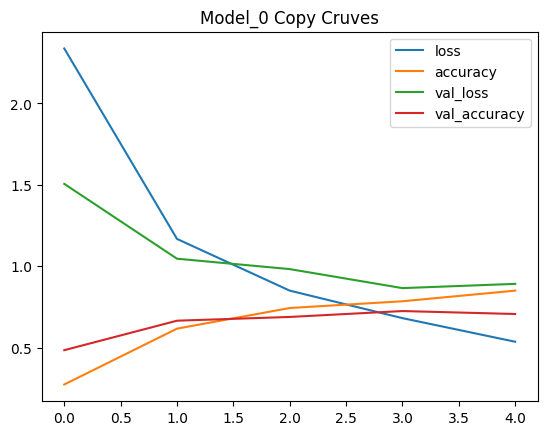

In [ ]:
h0_copy = pd.DataFrame(history_0_coy.history)
h0_copy.plot(title="Model_0 Copy Cruves")

In [ ]:
import tensorflow as tf
input_shape = (1,4,4,3)
input_tensor = tf.random.normal(input_shape)
print(tf.keras.layers.GlobalAveragePooling2D()(input_tensor))

tf.Tensor([[0.44991204 0.02413897 0.15936725]], shape=(1, 3), dtype=float32)


In [ ]:
tf.reduce_mean(input_tensor,axis=(1,2))

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.44991204, 0.02413897, 0.15936725]], dtype=float32)>

In [ ]:
input_shape = (1,4,4)
input_tensor = tf.random.normal(input_shape)
print(tf.keras.layers.GlobalAveragePooling1D()(input_tensor))

tf.Tensor([[-0.5117621   0.23338476  0.18752295  1.0851505 ]], shape=(1, 4), dtype=float32)


In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2024-05-24 05:16:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.207, 173.194.202.207, 173.194.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   187MB/s    in 0.7s    

2024-05-24 05:16:22 (187 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
train_dir = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'

In [ ]:
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                              batch_size=BATCH_SIZE,
                                                                              label_mode="categorical",
                                                                              image_size=IMAGE_SIZE)
test_train = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                              image_size=IMAGE_SIZE,
                                                                              batch_size=BATCH_SIZE,
                                                                              label_mode="categorical")

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

dataagumentation = keras.Sequential([
    layers.Rescaling(1/225.),
    layers.RandomZoom(0.2),
    #layers.RandomFlip("Horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
],name="Data_Augmentation")

(-0.5, 472.5, 476.5, -0.5)

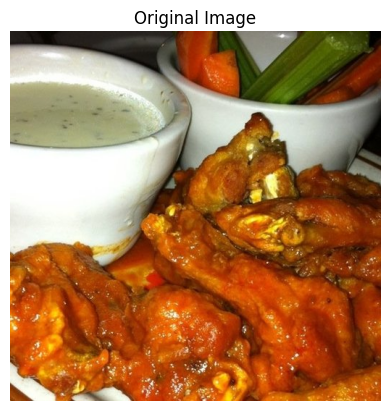

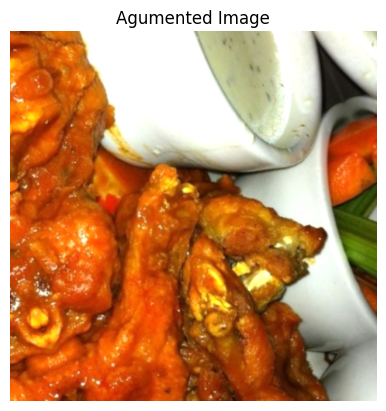

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mimage
import os
import random
target_class = random.choice(train_data.class_names)
target_dir = "10_food_classes_1_percent/train" + "/" + target_class
target_image = random.choice(os.listdir(target_dir))
img = mimage.imread(target_dir + "/" + target_image)
plt.imshow(img)
plt.title("Original Image")
plt.axis(False)
agumented_image = dataagumentation(img)
plt.figure()
plt.imshow(agumented_image)
plt.title("Agumented Image")
plt.axis(False)

In [ ]:
# Data Augumentation

data_agumentation = keras.Sequential([
    layers.RandomZoom(0.2),
    #layers.RandomFlip("Horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
],name="Data_Augmentation")

# Model Creation

input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
input_layer = layers.Input(shape=input_shape,name="Input_Layer")
x = data_agumentation(input_layer)
x = base_model(x,training=False)
x = layers.GlobalAveragePooling2D()(x)
output = layers.Dense(10,activation="softmax") (x)
model_1 = tf.keras.Model(input_layer,output)
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
mhistory_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                         validation_data=test_data,
                         validation_steps=int(0.25 * len(test_data)))

Epoch 1/5
3/3 [==============================] - 14s 3s/step - loss: 2.3668 - accuracy: 0.0857 - val_loss: 2.2200 - val_accuracy: 0.1727
Epoch 2/5
3/3 [==============================] - 6s 2s/step - loss: 2.1322 - accuracy: 0.2429 - val_loss: 2.0828 - val_accuracy: 0.2615
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 1.9244 - accuracy: 0.3857 - val_loss: 2.0008 - val_accuracy: 0.3536
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.7402 - accuracy: 0.5286 - val_loss: 1.8846 - val_accuracy: 0.4441
Epoch 5/5
3/3 [==============================] - 5s 2s/step - loss: 1.5922 - accuracy: 0.6429 - val_loss: 1.7819 - val_accuracy: 0.4967


In [ ]:
model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Data_Augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 10)                12810     
                                                           

<Axes: title={'center': 'Model_1 Loss Curves'}>

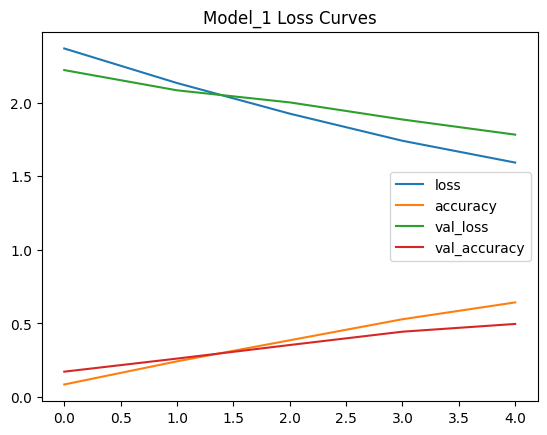

In [ ]:
h1 = pd.DataFrame(mhistory_1.history)
h1.plot(title="Model_1 Loss Curves")

In [ ]:
# Model_2 Training with the 10% of data
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
ten_percent_train_dir = "10_food_classes_10_percent/train"
ten_percent_test_dir = "10_food_classes_10_percent/test"
IMAGE_SHAPE = (224,224,3)
BATCH_SIZE = 32

ten_percent_train_data = image_dataset_from_directory(ten_percent_train_dir,
                                          image_size=IMAGE_SIZE,
                                          batch_size=BATCH_SIZE,
                                          label_mode="categorical")

ten_percent_test_data = image_dataset_from_directory(ten_percent_test_dir,
                                          image_size=IMAGE_SIZE,
                                          batch_size=BATCH_SIZE,
                                          label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Data_augmentation = keras.Sequential([
    layers.RandomZoom(0.2),
    layers.RandomFlip(),
    layers.RandomRotation(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
])

input_shape = (224,224,3)
base_model_2 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model_2.trainable = False
input_layer = tf.keras.layers.Input(shape=input_shape)
x = Data_augmentation(input_layer)
x = base_model_2(x,training=False)
x = layers.GlobalAveragePooling2D()(x)
output_layer = layers.Dense(10,activation="softmax")(x)
model_2 = tf.keras.Model(input_layer,output_layer)

In [ ]:
model_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (5

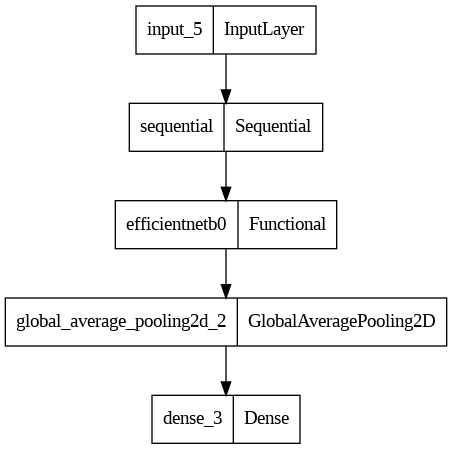

In [ ]:
tf.keras.utils.plot_model(model_2)

In [ ]:
## Model Checkpoints
checkpoint_dir = "checkpoint_dir/ten_percent_data/model_1/"
model_1_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_dir,
                                                        save_best_only=False,
                                                        save_weights_only=False,
                                                        save_freq='epoch',verbose=1)

In [ ]:
model_2.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_history = model_2.fit(ten_percent_train_data,
            epochs=5,
            steps_per_epoch=len(ten_percent_train_data),
            validation_data=ten_percent_test_data,
            validation_steps=len(ten_percent_test_data),
            callbacks=[model_1_checkpoint])

Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0345 - accuracy: 0.3080
Epoch 1: saving model to checkpoint_dir/ten_percent_data/model_1/
24/24 [==============================] - 60s 2s/step - loss: 2.0345 - accuracy: 0.3080 - val_loss: 1.5193 - val_accuracy: 0.6344
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3798 - accuracy: 0.6667
Epoch 2: saving model to checkpoint_dir/ten_percent_data/model_1/
24/24 [==============================] - 55s 2s/step - loss: 1.3798 - accuracy: 0.6667 - val_loss: 1.0613 - val_accuracy: 0.7560
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0879 - accuracy: 0.7307
Epoch 3: saving model to checkpoint_dir/ten_percent_data/model_1/
24/24 [==============================] - 55s 2s/step - loss: 1.0879 - accuracy: 0.7307 - val_loss: 0.8595 - val_accuracy: 0.7900
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.9045 - accuracy: 0.7720
Epoch 4: saving model to checkpoint_dir/ten

In [ ]:
pre_weights_loaded_results = model_2.evaluate(ten_percent_test_data)
pre_weights_loaded_results

79/79 [==============================] - 5s 62ms/step - loss: 0.6645 - accuracy: 0.8276


[0.6644815802574158, 0.8276000022888184]

<Axes: title={'center': 'Model_1 Loss Curvers'}>

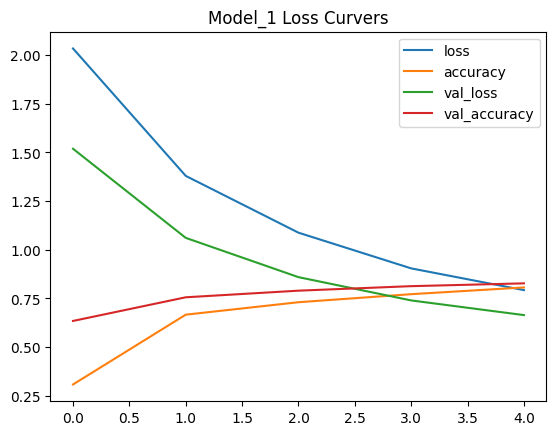

In [ ]:
model_2_h = pd.DataFrame(model_history.history)
model_2_h.plot(title="Model_1 Loss Curvers")

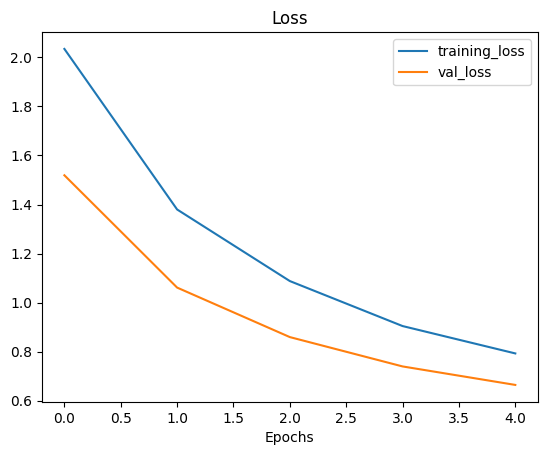

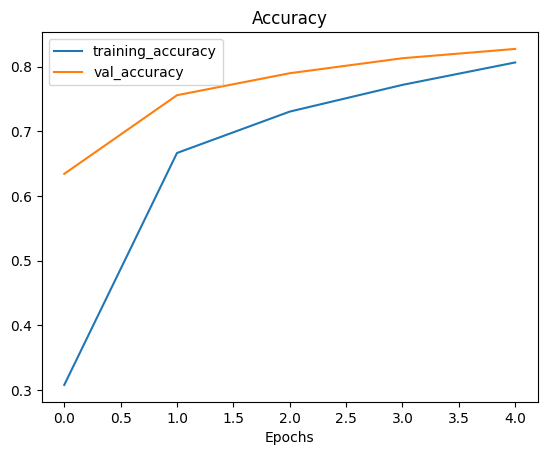

In [ ]:
plot_loss_curves(model_history)

In [ ]:
model_2.load_weights(checkpoint_dir)

In [ ]:
model_2_results = model_2.evaluate(test_data)

79/79 [==============================] - 5s 62ms/step - loss: 0.6645 - accuracy: 0.8276


In [ ]:
pre_weights_loaded_results == model_2_results

False

In [ ]:
model_2_results

[0.6644817590713501, 0.8276000022888184]

In [ ]:
pre_weights_loaded_results

[0.6644815802574158, 0.8276000022888184]

In [ ]:
import numpy as np
np.isclose(np.array(pre_weights_loaded_results),np.array(model_2_results))

array([ True,  True])

In [ ]:
print(np.array(pre_weights_loaded_results)-np.array(model_2_results))

[-1.78813934e-07  0.00000000e+00]


## Fine-Tuning Model

In [ ]:
model_2.layers

In [ ]:
for layer in model_2.layers:
  print(f"{layer} - {layer.trainable} ")

<keras.src.engine.input_layer.InputLayer object at 0x7b68bfc37fd0> - True 
<keras.src.engine.sequential.Sequential object at 0x7b683858da20> - True 
<keras.src.engine.functional.Functional object at 0x7b68c549d6c0> - False 
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7b68c5428550> - True 
<keras.src.layers.core.dense.Dense object at 0x7b68c549fe80> - True 


In [ ]:
for i,j in enumerate(model_2.layers[2].layers):
  print(i,j.trainable)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 False
67 False
68 False
69 False
70 False
71 False
72 False
73 False
74 False
75 False
76 False
77 False
78 False
79 False
80 False
81 False
82 False
83 False
84 False
85 False
86 False
87 False
88 False
89 False
90 False
91 False
92 False
93 False
94 False
95 False
96 False
97 False
98 False
99 False
100 False
101 False
102 False
103 False
104 False
105 False
106 False
107 False
108 False
109 False
110 False


In [ ]:
base_model_2.trainable = True
for layer in base_model_2.layers[:-10]:
  layer.trainable = False

model_2.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
for i, j in enumerate(model_2.layers[2].layers):
  print(i,j.trainable)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 False
67 False
68 False
69 False
70 False
71 False
72 False
73 False
74 False
75 False
76 False
77 False
78 False
79 False
80 False
81 False
82 False
83 False
84 False
85 False
86 False
87 False
88 False
89 False
90 False
91 False
92 False
93 False
94 False
95 False
96 False
97 False
98 False
99 False
100 False
101 False
102 False
103 False
104 False
105 False
106 False
107 False
108 False
109 False
110 False


In [ ]:
len(model_2.trainable_variables)

12

In [ ]:
fine_tune_history = model_2.fit(ten_percent_train_data,
                                epochs=10,
                                steps_per_epoch=len(ten_percent_train_data),
                                validation_data=ten_percent_test_data,
                                validation_steps=len(ten_percent_test_data),
                                initial_epoch=model_history.epoch[-1])

Epoch 5/10
24/24 [==============================] - 29s 827ms/step - loss: 0.7907 - accuracy: 0.7427 - val_loss: 0.4902 - val_accuracy: 0.8508
Epoch 6/10
24/24 [==============================] - 18s 752ms/step - loss: 0.3788 - accuracy: 0.8853 - val_loss: 0.4796 - val_accuracy: 0.8500
Epoch 7/10
24/24 [==============================] - 17s 697ms/step - loss: 0.2593 - accuracy: 0.9053 - val_loss: 0.4398 - val_accuracy: 0.8524
Epoch 8/10
24/24 [==============================] - 17s 691ms/step - loss: 0.1675 - accuracy: 0.9493 - val_loss: 0.4575 - val_accuracy: 0.8556
Epoch 9/10
24/24 [==============================] - 24s 997ms/step - loss: 0.1203 - accuracy: 0.9680 - val_loss: 0.4728 - val_accuracy: 0.8508
Epoch 10/10
24/24 [==============================] - 23s 955ms/step - loss: 0.1150 - accuracy: 0.9720 - val_loss: 0.5115 - val_accuracy: 0.8476


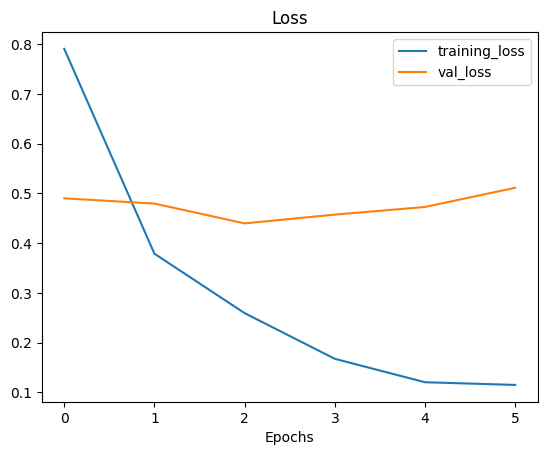

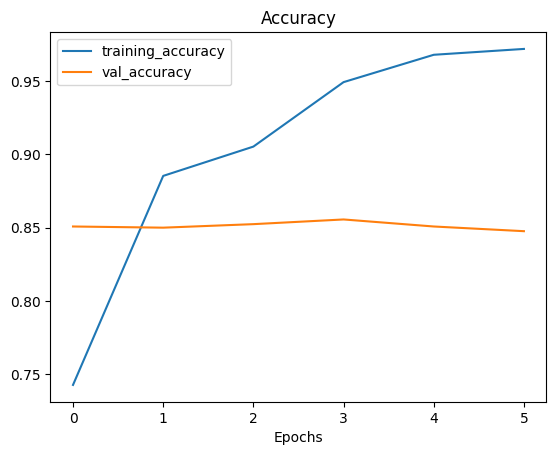

In [ ]:
plot_loss_curves(fine_tune_history)

In [ ]:
def compare_the_results(original_result,new_result,initial_epoch=5):
  """
    This Function compares the results of two models before and
    after finetuning a model
  """

  acc = original_result.history["accuracy"]
  loss = original_result.history['loss']
  val_loss = original_result.history['val_loss']
  val_accuracy = original_result.history['val_accuracy']

  total_acc = acc + new_result.history["accuracy"]
  total_loss = loss + new_result.history["loss"]
  total_val_loss = val_loss + new_result.history["val_loss"]
  total_val_accuracy = val_accuracy + new_result.history["val_accuracy"]

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc,label="Training_Accuracy")
  plt.plot(total_val_accuracy,label="Validation_Accuracy")
  plt.plot([initial_epoch-1,initial_epoch-1],plt.ylim(),label="Fine-Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss,label="Training_Loss")
  plt.plot(total_val_loss,label="Validation_Loss")
  plt.plot([initial_epoch-1,initial_epoch-1],plt.ylim(),label="Fine-Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Losses")

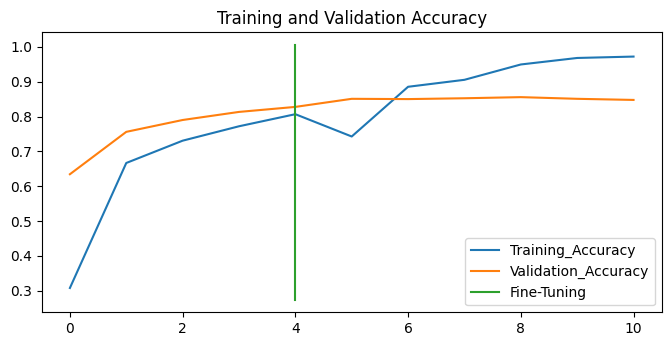

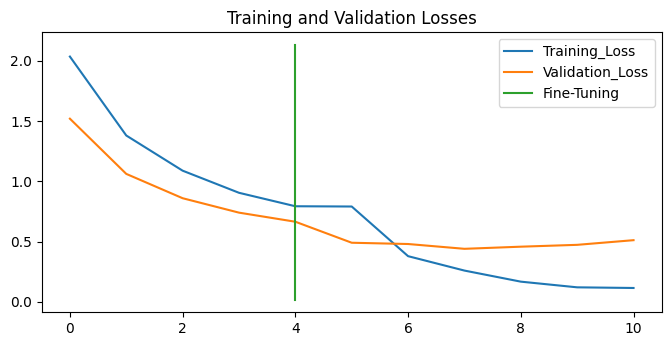

In [ ]:
compare_the_results(original_result=model_history,
                    new_result=fine_tune_history)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2024-05-24 05:29:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.207, 108.177.98.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  49.2MB/s    in 7.9s    

2024-05-24 05:29:08 (63.0 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
train_dir_all_data = "10_food_classes_all_data/train/"
test_data = "10_food_classes_all_data/test"
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 

In [ ]:
import tensorflow as tf

train_data_all = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                 image_size=(224,224),
                                                                 batch_size=32,
                                                                 label_mode="categorical")
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_data,
                                                                 image_size=(224,224),
                                                                 batch_size=32,
                                                                 label_mode="categorical")

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
main_model = tf.keras.applications.EfficientNetV2B0(include_top=False)
main_model.trainable = False
input_layer = tf.keras.layers.Input(shape=(224,224,3),name="Input_Layer")
x = Data_augmentation(input_layer)
x = main_model(x,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output_layers = tf.keras.layers.Dense(10,activation="softmax") (x)
model_3 = tf.keras.Model(input_layer,output_layers)

In [ ]:
model_3.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_3 = model_3.fit(ten_percent_train_data,
            epochs=5,
            steps_per_epoch=len(ten_percent_train_data),
            validation_data=test_data,
            validation_steps=int(0.25 * len(test_data)))

Epoch 1/5
24/24 [==============================] - 24s 612ms/step - loss: 2.0021 - accuracy: 0.3427 - val_loss: 1.5092 - val_accuracy: 0.6678
Epoch 2/5
24/24 [==============================] - 10s 392ms/step - loss: 1.4052 - accuracy: 0.6640 - val_loss: 1.0958 - val_accuracy: 0.7632
Epoch 3/5
24/24 [==============================] - 10s 424ms/step - loss: 1.1108 - accuracy: 0.7333 - val_loss: 0.8699 - val_accuracy: 0.8076
Epoch 4/5
24/24 [==============================] - 10s 399ms/step - loss: 0.9568 - accuracy: 0.7627 - val_loss: 0.7703 - val_accuracy: 0.7928
Epoch 5/5
24/24 [==============================] - 13s 536ms/step - loss: 0.8594 - accuracy: 0.7787 - val_loss: 0.6803 - val_accuracy: 0.8240


In [ ]:
for layer in model_3.layers:
  print(layer,layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7b6825273eb0> True
<keras.src.engine.sequential.Sequential object at 0x7b683858da20> True
<keras.src.engine.functional.Functional object at 0x7b67db428fa0> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7b6825271b40> True
<keras.src.layers.core.dense.Dense object at 0x7b67db5d0310> True


In [ ]:
for i,j in enumerate(model_3.layers[2].layers):
  print(i,j.trainable)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 False
67 False
68 False
69 False
70 False
71 False
72 False
73 False
74 False
75 False
76 False
77 False
78 False
79 False
80 False
81 False
82 False
83 False
84 False
85 False
86 False
87 False
88 False
89 False
90 False
91 False
92 False
93 False
94 False
95 False
96 False
97 False
98 False
99 False
100 False
101 False
102 False
103 False
104 False
105 False
106 False
107 False
108 False
109 False
110 False


In [ ]:
main_model.trainable = True
for layer in main_model.layers[:-10]:
  layer.trainable = False

model_2.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
for layer in model_3.layers:
  print(layer,layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7b6825273eb0> True
<keras.src.engine.sequential.Sequential object at 0x7b683858da20> True
<keras.src.engine.functional.Functional object at 0x7b67db428fa0> True
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7b6825271b40> True
<keras.src.layers.core.dense.Dense object at 0x7b67db5d0310> True


In [ ]:
for i,j in enumerate(model_3.layers[2].layers):
  print(i,j.trainable)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 False
67 False
68 False
69 False
70 False
71 False
72 False
73 False
74 False
75 False
76 False
77 False
78 False
79 False
80 False
81 False
82 False
83 False
84 False
85 False
86 False
87 False
88 False
89 False
90 False
91 False
92 False
93 False
94 False
95 False
96 False
97 False
98 False
99 False
100 False
101 False
102 False
103 False
104 False
105 False
106 False
107 False
108 False
109 False
110 False


In [ ]:
fine_tune_history_model_3 = model_3.fit(train_data_all,
                                epochs=10,
                                steps_per_epoch=len(train_data_all),
                                validation_data=test_data,
                                validation_steps=len(test_data),
                                initial_epoch=history_3.epoch[-1])

Epoch 5/10
235/235 [==============================] - 91s 353ms/step - loss: 0.7980 - accuracy: 0.7573 - val_loss: 0.4177 - val_accuracy: 0.8760
Epoch 6/10
235/235 [==============================] - 74s 312ms/step - loss: 0.6704 - accuracy: 0.7864 - val_loss: 0.3710 - val_accuracy: 0.8800
Epoch 7/10
235/235 [==============================] - 66s 278ms/step - loss: 0.6168 - accuracy: 0.8037 - val_loss: 0.3328 - val_accuracy: 0.8932
Epoch 8/10
235/235 [==============================] - 60s 252ms/step - loss: 0.5735 - accuracy: 0.8155 - val_loss: 0.3210 - val_accuracy: 0.8924
Epoch 9/10
235/235 [==============================] - 56s 235ms/step - loss: 0.5508 - accuracy: 0.8232 - val_loss: 0.3145 - val_accuracy: 0.8940
Epoch 10/10
235/235 [==============================] - 53s 221ms/step - loss: 0.5404 - accuracy: 0.8256 - val_loss: 0.3003 - val_accuracy: 0.9020


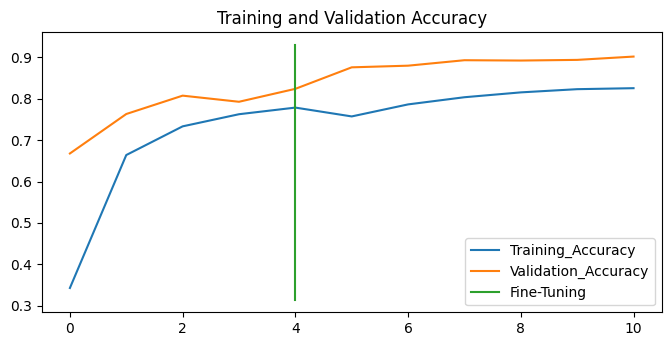

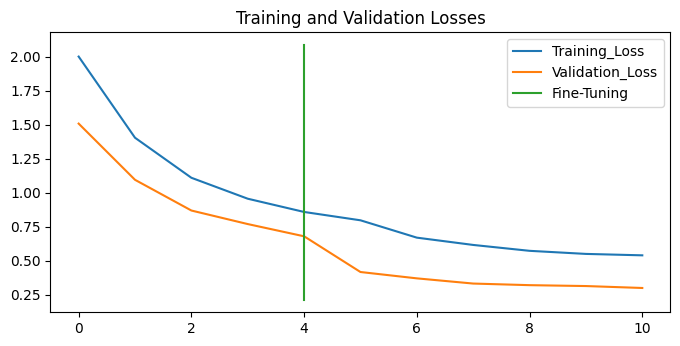

In [ ]:
compare_the_results(history_3,fine_tune_history_model_3)

In [ ]:
model_3.evaluate(test_data)

79/79 [==============================] - 8s 91ms/step - loss: 0.3003 - accuracy: 0.9020


[0.30028319358825684, 0.9020000100135803]